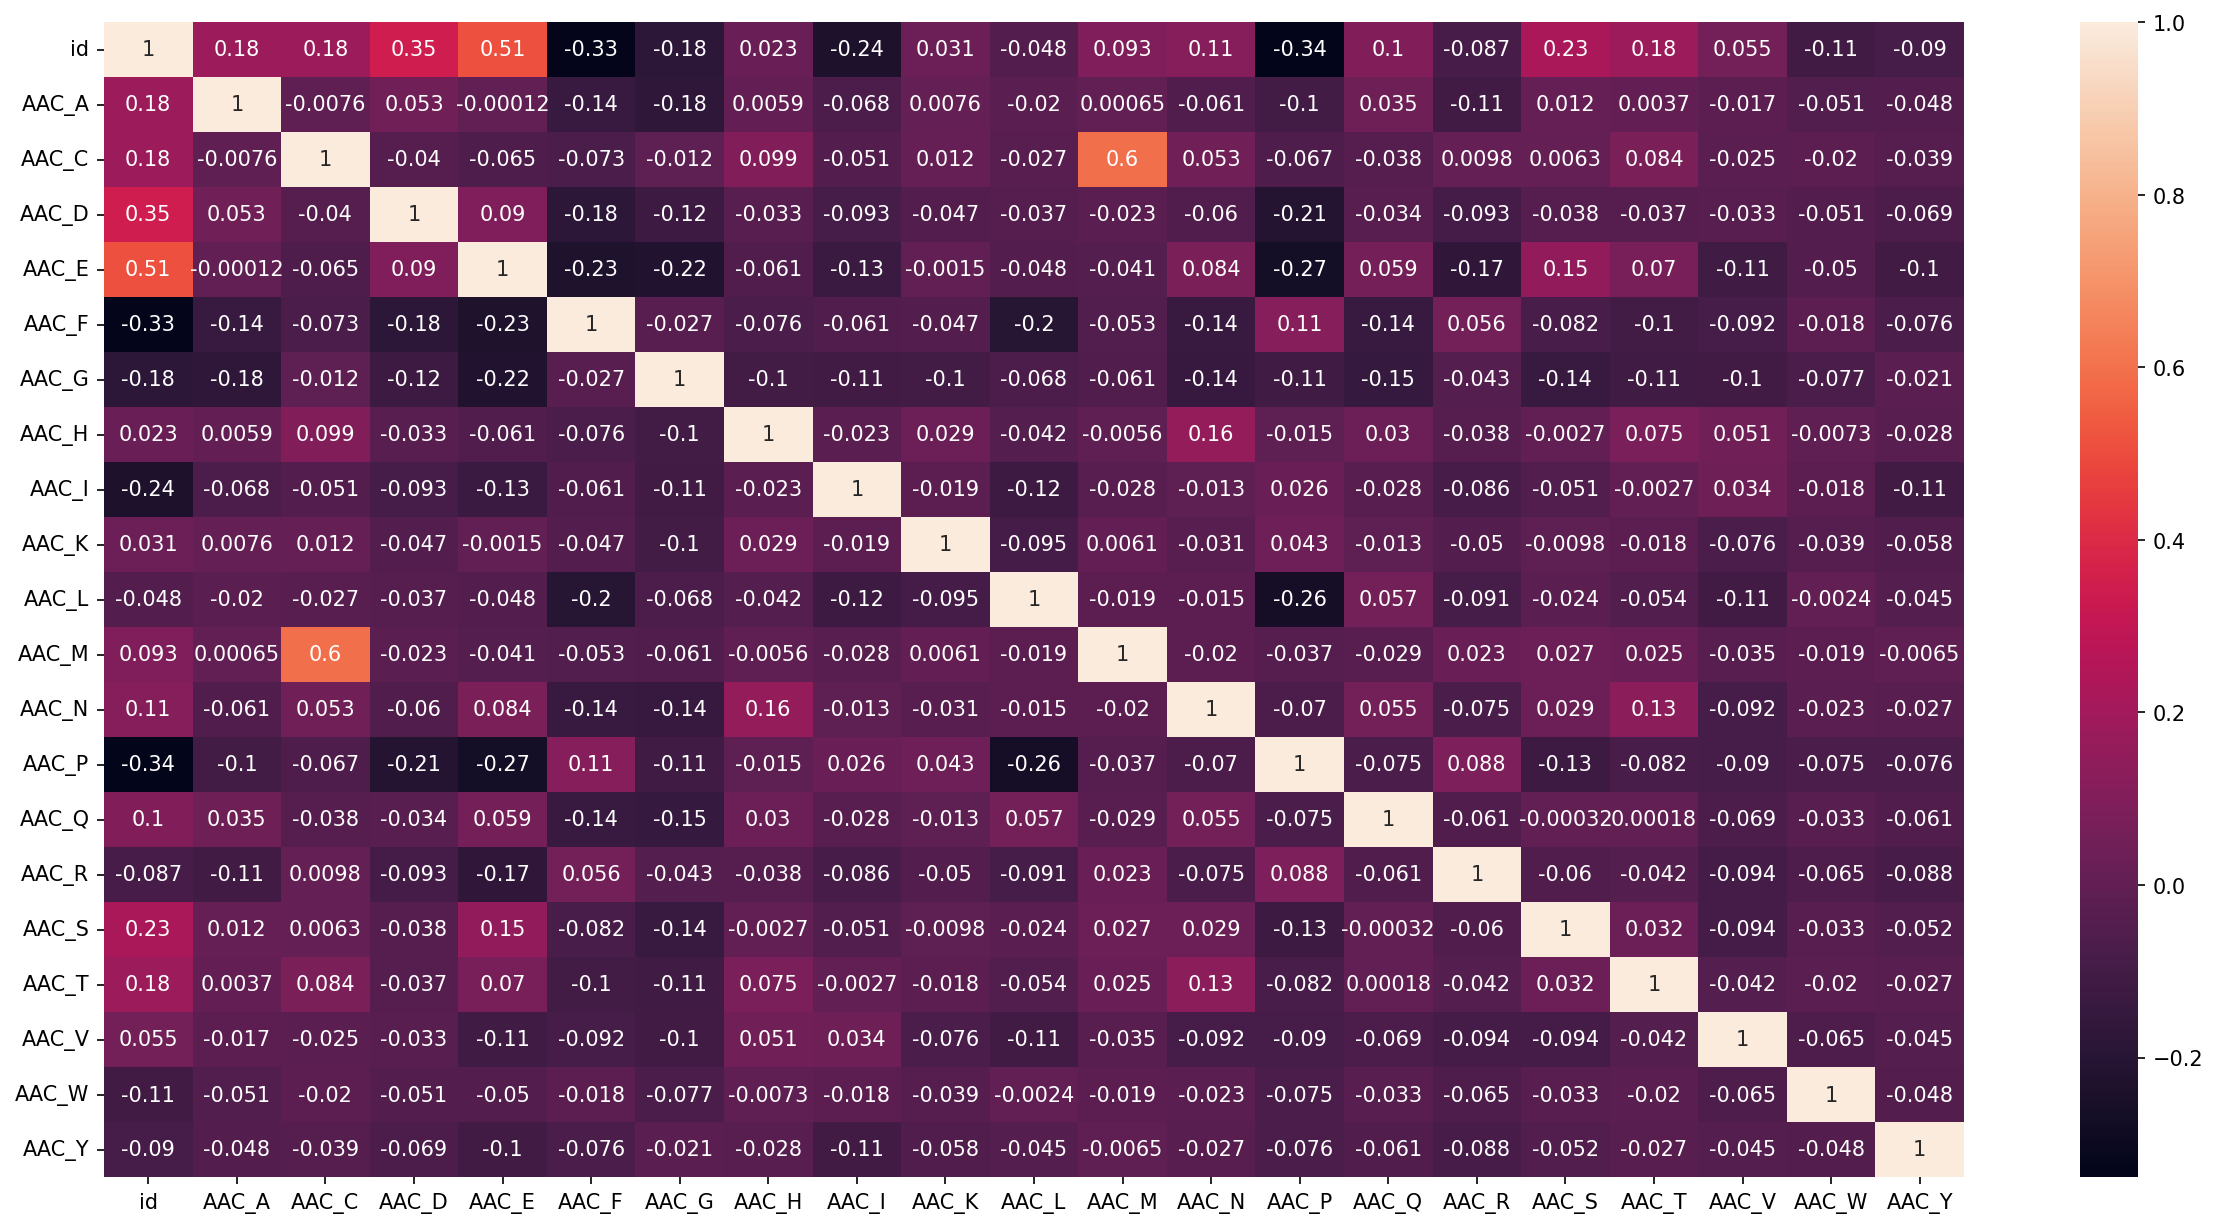

In [44]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings



#reading the data
data = pd.read_csv('final_data.csv')
data.head()
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(data.corr(), annot=True)
#checking the shape of the data
data.shape
Y=data['id']
X=data.drop(['id'],axis=1)

#preprocessing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)


In [45]:
X.shape
Y.shape

(442,)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

X_train.shape

(353, 20)

In [47]:
import lazypredict
from sklearn.metrics import matthews_corrcoef

from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=matthews_corrcoef)
# models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
# print(models)

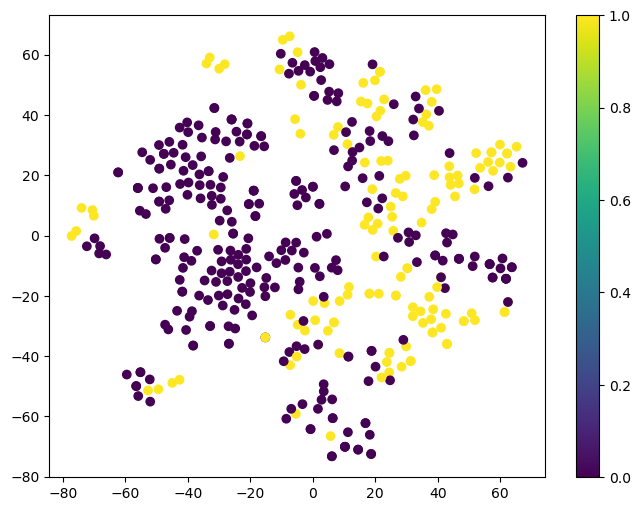

In [48]:
#tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)


#plotting the tsne
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0],X_2d[:,1],c=Y,cmap='viridis')
plt.colorbar()
plt.show()


In [49]:
#SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train,Y_train = smote.fit_resample(X_train,Y_train)


In [50]:
X_train.shape
Y_train.shape

(353,)

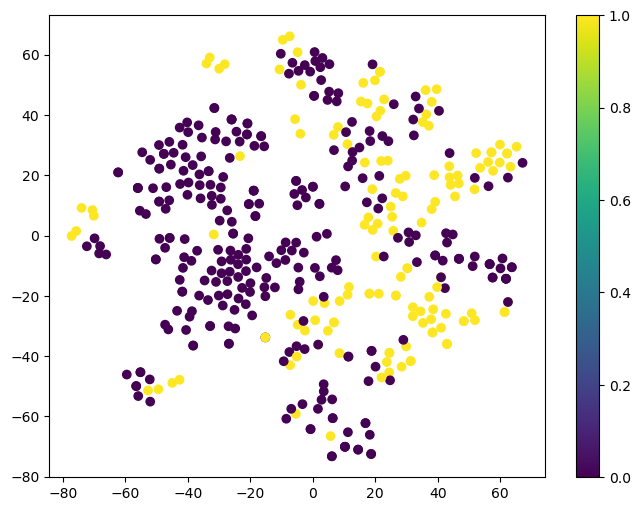

In [51]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)


#plotting the tsne
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0],X_2d[:,1],c=Y,cmap='viridis')
plt.colorbar()
plt.show()


In [52]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,balanced_accuracy_score

print(accuracy_score(Y_test,Y_pred))
print(balanced_accuracy_score(Y_test,Y_pred))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))


0.898876404494382
0.8833943833943834
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.81      0.85      0.83        26

    accuracy                           0.90        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.90      0.90      0.90        89



In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm


array([[58,  5],
       [ 4, 22]])

0.8833943833943834
Matthews Correlation Coefficient: 0.7584989149593024
Area Under the Curve (AUC): 0.9606227106227107


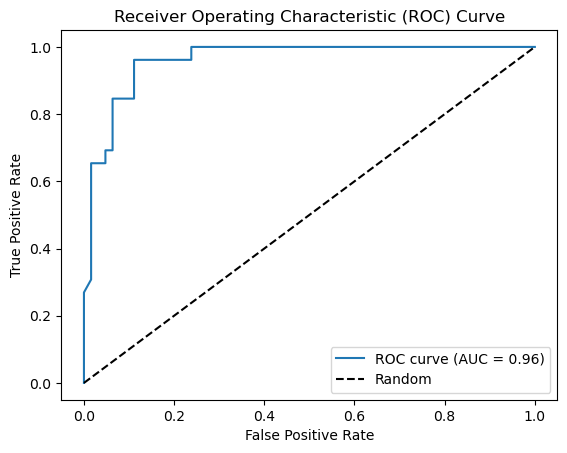

In [54]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


Y_prob = model.predict_proba(X_test)[:, 1]
# Calculate Balanced Accuracy (Bacc)
print(balanced_accuracy_score(Y_test,Y_pred))

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Area Under the Curve (AUC)
auc = roc_auc_score(Y_test, Y_prob)
print("Area Under the Curve (AUC):", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


0.8426966292134831
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.77      0.65      0.71        26

    accuracy                           0.84        89
   macro avg       0.82      0.79      0.80        89
weighted avg       0.84      0.84      0.84        89

0.7872405372405372
Balanced Accuracy: 0.8426966292134831
Matthews Correlation Coefficient: 0.6055973037919131
Area Under the Curve (AUC): 0.8669108669108669


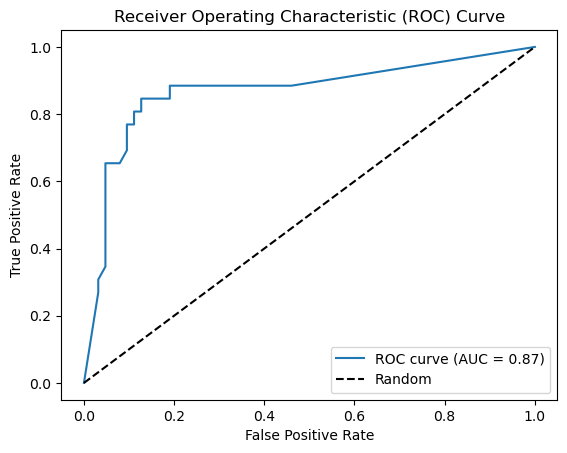

In [60]:
#extremely random trees
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
Y_prob = model.predict_proba(X_test)[:, 1]
# Calculate Balanced Accuracy (Bacc)
print(balanced_accuracy_score(Y_test,Y_pred))
bacc = accuracy_score(Y_test, Y_pred)
print("Balanced Accuracy:", bacc)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Area Under the Curve (AUC)
auc = roc_auc_score(Y_test, Y_prob)
print("Area Under the Curve (AUC):", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



0.7951770451770452
0.8539325842696629
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        63
           1       0.81      0.65      0.72        26

    accuracy                           0.85        89
   macro avg       0.84      0.80      0.81        89
weighted avg       0.85      0.85      0.85        89

Balanced Accuracy: 0.8539325842696629
Matthews Correlation Coefficient: 0.6322741430720402
Area Under the Curve (AUC): 0.9075091575091575


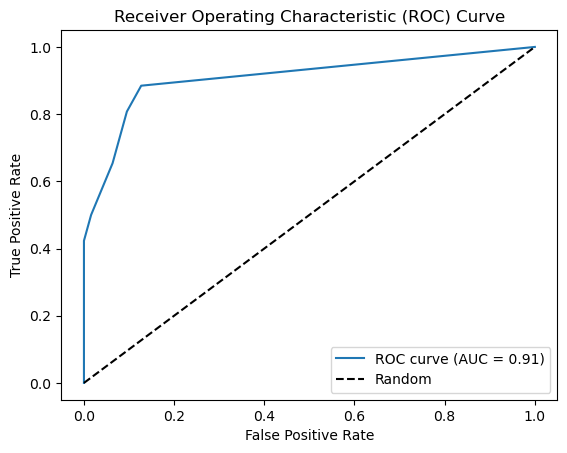

In [61]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
print(balanced_accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
Y_prob = model.predict_proba(X_test)[:, 1]
# Calculate Balanced Accuracy (Bacc)
bacc = accuracy_score(Y_test, Y_pred)
print("Balanced Accuracy:", bacc)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Area Under the Curve (AUC)
auc = roc_auc_score(Y_test, Y_prob)
print("Area Under the Curve (AUC):", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


0.8314606741573034
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.74      0.65      0.69        26

    accuracy                           0.83        89
   macro avg       0.80      0.78      0.79        89
weighted avg       0.83      0.83      0.83        89

0.7793040293040293
Matthews Correlation Coefficient: 0.5802675168042901
Area Under the Curve (AUC): 0.920940170940171


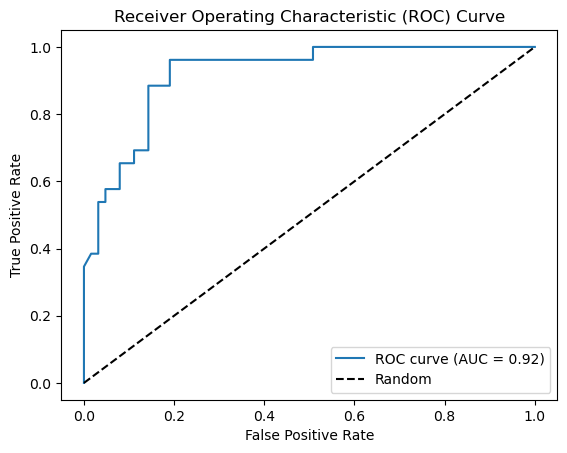

In [62]:
#random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
Y_prob = model.predict_proba(X_test)[:, 1]
# Calculate Balanced Accuracy (Bacc)
print(balanced_accuracy_score(Y_test,Y_pred))

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Area Under the Curve (AUC)
auc = roc_auc_score(Y_test, Y_prob)
print("Area Under the Curve (AUC):", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [63]:
#SVM
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

print(balanced_accuracy_score(Y_test,Y_pred))

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Area Under the Curve (AUC)

#print parameters of svc
model.get_params()

0.8764044943820225
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.78      0.81      0.79        26

    accuracy                           0.88        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.88      0.88      0.88        89

0.8562271062271063
Matthews Correlation Coefficient: 0.7047517784693519


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
#hyperparameter tuning for svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
param_grid = {'C':[0.1,0.5,1,10,100],'gamma':['scale','auto'],'kernel':['rbf','poly','sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,Y_train)
#print best parameters and best estimator



print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(accuracy_score(Y_test,grid_predictions))
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,grid_predictions))



{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=1, gamma='auto')
0.8764044943820225
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.78      0.81      0.79        26

    accuracy                           0.88        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.88      0.88      0.88        89

